# Final exam from "Introduction to Machine Learning" - Romario Stanković 2020230210

### 0) Setup

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd

In [21]:
# Computes the square of a vector
def square(V : np.ndarray):
    return V ** 2

In [22]:
# Computes the average of a vector
def avg(V : np.ndarray):
    return sum(V) / len(V)

In [23]:
# Transposes a matrix
def transpose(M : np.ndarray):
    r = len(M)
    c = len(M[0])

    N = []

    for j in range(c):
        C = []
        for i in range(r):
            val = M[i][j]
            C.append(val)
        N.append(C)

    return np.array(N)

In [24]:
# Computes the dot product of a matrix and a vector
def dot(M : np.ndarray, V : np.ndarray):

    r = M.shape[0]
    c = M.shape[1]

    D = []

    for i in range(r):
        value = 0.0
        for j in range(c):
            value = value + M[i][j] * V[j]
        D.append(value)

    return np.array(D)

In [25]:
# Computes the standard deviation of a vector
def std(V : np.ndarray):
    n = len(V)
    mean = avg(V)

    variation = 0.0
    for i in range(n):
        variation = variation + (V[i] - mean) ** 2

    std = (variation / n) ** 0.5

    return std

In [26]:
# Normalizes a matrix
def normalize(x : np.ndarray):

    n = x.shape[1]

    for i in range(n):

        m = avg(x[:, i])
        s = std(x[:, i])

        x[:, i] = (x[:, i] - m) / s

    return x

In [27]:
# Splits the data into training and testing sets
def train_test_split(x : np.ndarray, y : np.ndarray, test_size = 0.2):

    m = x.shape[0]

    index = np.arange(m)
    np.random.shuffle(index)

    size = int(m * test_size)

    x_train = x[index[size:]]
    y_train = y[index[size:]]
    x_test = x[index[:size]]
    y_test = y[index[:size]]

    return (x_train, x_test, y_train, y_test)

In [28]:
# Encodes the labels (from strings to integers)
def encode_labels(y : np.ndarray):
    dict = {}
    index = 0

    result = []

    for i in range(len(y)):
        if y[i] not in dict:
            dict[y[i]] = index
            index = index + 1
        result.append(dict[y[i]])

    return np.array(result)

In [29]:
def mse(actual : np.ndarray, predicted : np.ndarray):

    return sum(square(actual - predicted)) / len(actual)

### 1) Linear Regression

In [30]:
class LinearRegression:

    # Initialize LinearRegression
    def __init__(self, learning_rate : float = 0.01, iterations : int = 100, batch_size : int = 16):
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.cost = []
        self.coef = None

    # Get the next batch of features and targets
    def get_next_batch(self, x : np.ndarray, y : np.ndarray):

        # Get number of samples
        m = x.shape[0]

        # Store the batch size in a local variable
        size = self.batch_size

        # Take (size) features and targets 
        for i in range(0, m, size):
            # Yield the result, stopping the function at this points until the next call
            yield ( x[i : i + size], y[i : i + size] )

    # Calculates the cost of the hypothesis
    def calculate_cost(self, hypothesis : np.ndarray, target : np.ndarray):
        # Get the number of samples
        s = hypothesis.shape[0]
        # Return the cost of linear regression
        return (1 / s) * 0.5 * sum(square(hypothesis - target))

    # Performs the backwards propagation
    def backwards_propagation(self, x : np.ndarray, y : np.ndarray, h : np.ndarray, theta : np.ndarray, no_samples : int):

        # Get number of theta variables
        n = theta.shape[0]

        # Update the bias
        theta[0] = theta[0] - (self.learning_rate * 2 / no_samples) * sum(h - y)

        # Update the coefficients
        for i in range(1, n):
            theta[i] = theta[i] - (self.learning_rate * 2 / no_samples) * sum((h - y) * transpose(x)[i])

        return theta

    # Calculates the hypothesis
    def hypothesis(self, x : np.ndarray, theta : np.ndarray):

        # Get the number of samples
        m = x.shape[0]
        n = x.shape[1]

        # initialize the hypothesis
        H = np.ones((m, 1))

        # Reshape theta to be a matrix with 1 row and n columns
        theta = theta.reshape(1, n)

        # Go through the samples and calculate the hypothesis
        for i in range(m):
            H[i] = dot(theta, x[i])

        # Return the hypothesis
        return H.reshape(m)

    # Fit the model
    def fit(self, x : np.ndarray, y : np.ndarray):

        # Get the number of features (n) and samples (m)
        no_samples = x.shape[0]
        no_features = x.shape[1]

        # Initialize the bias
        bias = np.ones((no_samples, 1))
        theta = np.random.randn(no_features+1) * 0.001

        x = np.concatenate((bias, x), axis = 1)

        for _ in range(self.iterations):
            
            loss = []
            for _, (x_batch, y_batch) in enumerate(self.get_next_batch(x, y)):
                # Make a hypothesis
                h = self.hypothesis(x_batch, theta)

                # Add loss for each batch
                cost = self.calculate_cost(h, y_batch)
                loss.append(cost)

                theta = self.backwards_propagation(x_batch, y_batch, h, theta, no_samples)

            # Save the cost of this iteration
            self.cost.append(avg(loss))

        self.coef = theta
    
        return self

    # Predict the target
    def predict(self, x : np.ndarray):

        # Get the number of samples
        m = x.shape[0]

        # Initialize the bias
        bias = np.ones((m, 1))

        # Concatenate the bias with the input data
        x = np.concatenate((bias, x), axis = 1)

        # Make a hypothesis
        h = self.hypothesis(x, self.coef)

        return h

In [31]:
# Load the data
csv = np.loadtxt('wine-quality.csv', delimiter=',', dtype=str)
columns = csv[0,:]
data = csv[1:, :]

# Select all except the pH column as the features
X = data[:, np.arange(data.shape[1]) != 8].astype(float)
# Select the pH column as the target
Y = data[:, 8].astype(float)

X = normalize(X)

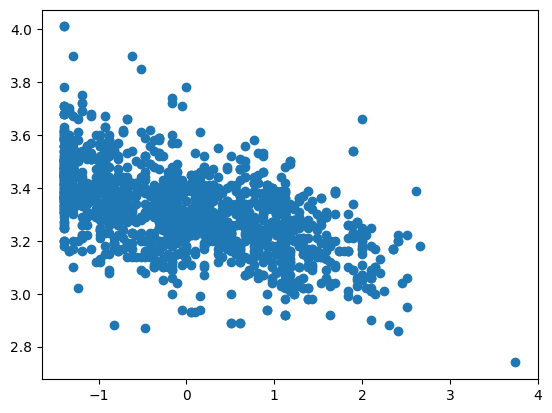

In [32]:
plt.scatter(X[:, 2], Y)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 0.2)

In [35]:
model = LinearRegression(iterations=200)

model.fit(X, Y)

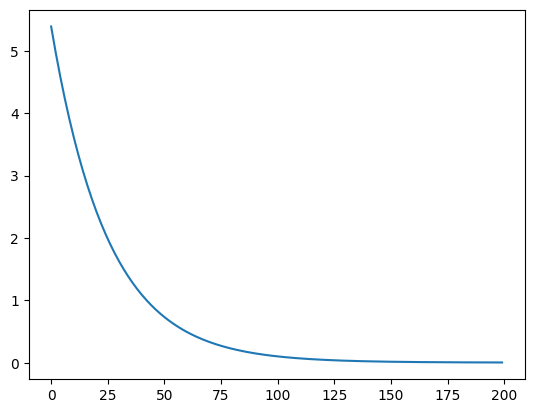

In [36]:
cost = model.cost

plt.plot(cost)

In [42]:
y_pred = model.predict(x_test)

err = mse(y_pred, y_test)

print(err)

0.013852205051339295


### 2) Logistic Regression

In [43]:
class LogisticRegression:

    def __init__(self, learning_rate : float = 0.001, regularization_param : float = 2, iterations : int = 100, batch_size : int = 10):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.batch_size = batch_size
        self.regularization_param = regularization_param
        self.cost = []
        self.coef = None

    def next_batch(self, x : np.ndarray, y : np.ndarray):
            # Get the number of samples
            m = x.shape[0]
    
            # Store the batch size in a local variable
            size = self.batch_size
    
            # Take (size) features and targets 
            for i in range(0, m, size):
                # Yield the result, stopping the function at this points until the next call
                yield ( x[i : i + size], y[i : i + size] )

    def sigmoid(self, z : np.ndarray):
        # Return the sigmoid of z
        return 1 / (1 + np.exp(-z))

    def cost_function(self, h : np.ndarray, y : np.ndarray):
        # Add a small value to avoid division by zero
        e = 1e-10
        # Calculate the cost function
        return -avg(y * np.log(h + e) + (1 - y) * np.log(1 - h + e))

    def fit(self, x : np.ndarray, y : np.ndarray):

        # Get the number of features (n) and samples (m)
        n = x.shape[1]
        m = x.shape[0]

        # Initialize the bias
        bias = np.ones((m, 1))
        x = np.concatenate((bias, x), axis = 1)

        # Initialize the coefficients
        W = np.random.randn(n+1)

        # Go through the iterations
        for _ in range(self.iterations):
            
            # Initialize the loss
            loss = []

            # Go through each batch
            for _, (x_batch, y_batch) in enumerate(self.next_batch(x, y)):

                # Get the number of samples in the batch
                bm = x_batch.shape[0]

                # Calculate the hypothesis
                z = dot(x_batch, W)
                h = self.sigmoid(z)

                # Calculate the cost
                ridge = (self.regularization_param / (2 * bm)) * sum(square(W))
                cost = self.cost_function(h, y_batch) + ridge
                loss.append(cost)

                # Calculate the gradient
                error = h - y_batch
                gradient = (1 / bm) * (dot(transpose(x_batch), error) + (self.regularization_param / bm) * W)

                # Update the coefficients
                W = W - self.learning_rate * gradient

            # Save the cost of this iteration
            self.cost.append(avg(loss))

        # Save the coefficients
        self.coef = W

        return self

    def predict(self, x : np.ndarray, threshold : float = 0.5):

        labels = []

        # Get the coefficients
        W = self.coef[1:]
        # Get the bias
        b = self.coef[0]

        # Predict the labels
        y_pred = dot(x, W) + b
        # Calculate the activation
        activation = self.sigmoid(y_pred)

        # Go through the activation and assign the labels
        for i in activation:
            # If the activation is greater than the threshold, assign 1, else assign 0
            if i > threshold:
                labels.append(1)
            else:
                labels.append(0)

        # Return the labels
        return np.array(labels)

In [44]:
csv = np.loadtxt('breast-cancer.csv', delimiter=',', dtype=str)
columns = csv[0,:]
data = csv[1:, :]

X = data[:, 1:].astype(float)
Y = data[:, 0]

X = normalize(X)
Y = encode_labels(Y)

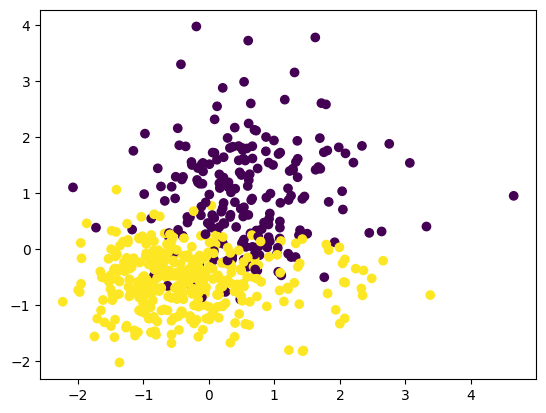

In [45]:
plt.scatter(X[:, 1], X[:, 0], c=Y)

In [46]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 0.2)

In [47]:
model = LogisticRegression(iterations=100, learning_rate=0.01, regularization_param=0.1)

model.fit(x_train, y_train)

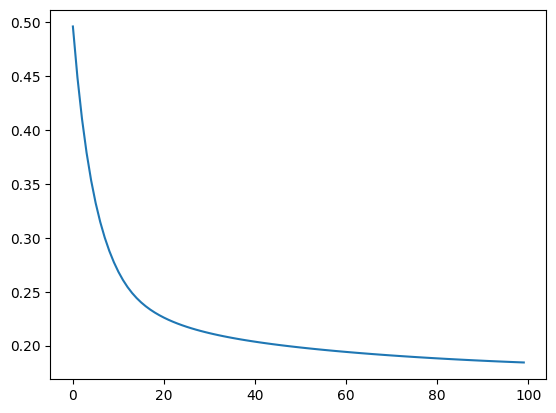

In [48]:
cost = model.cost

plt.plot(cost)

In [49]:
y_pred = model.predict(x_test)

print(sum(y_pred == y_test) / len(y_test))

0.9557522123893806


In [50]:
def dot_product(weights, input_data):
    """
    Perform the forward pass through the network
    """

    # grab the bias term (the last element in the list)
    z = weights[-1]

    for i in range(len(weights)-1):
        # z = (weight_{i} * input_data_{i}) + bias
        z += weights[i] * input_data[i] 
    
    return z

### 3) Neural Networks

In [195]:
class NeuralNetwork:

    def __init__(self, n_inputs : int, n_hidden : int, n_outputs : int, iterations : int = 100, learning_rate : float = 0.01):
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.n_inputs = n_inputs
        self.n_hidden = n_hidden
        self.n_outputs = n_outputs
        self.costs = []

        self.init_weights()

    def init_weights(self):

        hidden_layer_weights = []
        output_layer_weights = []

        # Initialize the weights randomly [0, 1] based on the number of inputs
        for _ in range(self.n_hidden):
            w = {"weights": [rd.random() for _ in range(self.n_inputs + 1)]}
            hidden_layer_weights.append(w)

        # Initialize the weights randomly [0, 1] based on the number of hidden neurons
        for _ in range(self.n_outputs):
            w = {"weights": [rd.random() for _ in range(self.n_hidden + 1)]}
            output_layer_weights.append(w)

        self.network = [hidden_layer_weights, output_layer_weights]

    def sigmoid(self, z):

        return 1 / (1 + np.exp(-z))

    def derived_sigmoid(self, z):

        return z * (1 - z)
    
    def forward_propagation(self, x : np.ndarray):

        for layer in self.network:

            new_inputs = []

            for neuron in layer:

                z = dot_product(neuron["weights"], x)
                neuron["output"] = self.sigmoid(z)
                new_inputs.append(neuron["output"])

            x = new_inputs

        return x
    
    def backward_propagation(self, y : np.ndarray):

        size = len(self.network)

        for i in reversed(range(size)):

            layer = self.network[i]
            errors = []
            layer_size = len(layer)

            if i != size - 1:

                for j in range(layer_size):
                    error = 0.0
                    for neuron in self.network[i + 1]:
                        error += neuron["weights"][j] * neuron["delta"]
                    errors.append(error)
            else:
                for j in range(layer_size):
                    neuron = layer[j]
                    error = y[j] - neuron["output"]
                    errors.append(error)

            for j in range(layer_size):
                neuron = layer[j]
                neuron["delta"] = errors[j] * self.derived_sigmoid(neuron["output"])

    def update_weights(self, x : np.ndarray):

        size = len(self.network)

        for i in range(size):

            inputs = x[:-1]

            if i != 0:
                inputs = [neuron["output"] for neuron in self.network[i - 1]]

            for neuron in self.network[i]:
                for j in range(len(inputs)):
                    neuron["weights"][j] += self.learning_rate * neuron["delta"] * inputs[j]
                neuron["weights"][-1] += self.learning_rate * neuron["delta"]

    def fit(self, x : np.ndarray, y : np.ndarray):

        targets = np.unique(y)

        for _ in range(self.iterations):

            m = x.shape[0]

            error = 0.0

            for i in range(m):

                # Make the predictions
                outputs = self.forward_propagation(x[i])

                # Define actual output neurons values
                actual = (targets == y[i]) * 1

                error += mse(np.array(actual), np.array(outputs))
                self.backward_propagation(actual)
                self.update_weights(x[i])

            self.costs.append(error)

    def predict (self, x : np.ndarray):

        predictions = []

        for row in x:
            outputs = self.forward_propagation(row)
            predictions.append(outputs.index(max(outputs)))

        return predictions

In [196]:
dataset = np.array([[2.7,2.5,0],
           [1.4,2.3,0],
           [3.3,4.4,0],
           [1.3,1.8,0],
           [3.0,3.0,0],
           [7.6,2.7,1],
           [5.3,2.0,1],
           [6.9,1.7,1],
           [8.6,1.0,1],
           [7.6,3.5,1]])

In [197]:
n_inputs = len(dataset[0]) - 1 # Number of features
n_hidden = 2
n_outputs = len(set([row[-1] for row in dataset])) # Number of classes

model = NeuralNetwork(n_inputs, n_hidden, n_outputs, iterations=200, learning_rate=0.5)

print(model.network)

[[{'weights': [0.19152933957360474, 0.5250954007974392, 0.03883415917820976]}, {'weights': [0.1579070670225836, 0.09759352714892267, 0.9475878442278584]}], [{'weights': [0.8578306370256363, 0.8487645915094788, 0.2192065202254624]}, {'weights': [0.07920027014426301, 0.1702452990538611, 0.30404070075263767]}]]


In [198]:
model.fit(dataset, dataset[:, -1])

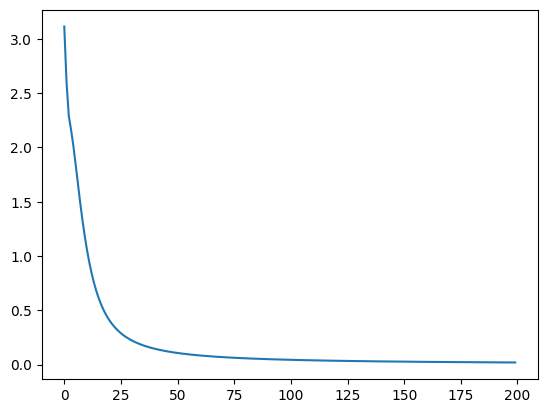

In [199]:
costs = model.costs

plt.plot(costs)

In [78]:
y_pred = model.predict(dataset)

print(y_pred)
print([row[-1] for row in dataset])

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


### 4) K-Means

In [25]:
class KMeans:

    # Initialize KMeans
    def __init__(self, max_iterations : int = 100, n_clusters : int = 2):
        self.max_iterations = max_iterations
        self.n_clusters = n_clusters
        self.centroids = None
        self.history = []

    # Calculate the distance between two points
    def distance(self, a : np.ndarray, b : np.ndarray):
        return np.sqrt(sum((a - b) ** 2))

    # Select random samples as the initial centroids
    def init_centroids(self, x : np.ndarray):
        m = x.shape[0]

        indices = np.random.choice(m, self.n_clusters)
        return x[indices]

    # Assign each sample to the closest centroid
    def assign_to_centroid(self, x : np.ndarray):

        # Calculate the euclidean distance between each sample and each centroid
        distances = np.sqrt(((x - self.centroids[:, np.newaxis])**2).sum(axis=2))
        # Find the closest centroid for each sample
        clusters = np.argmin(distances, axis=0)
        # Return an array which contains the closest centroid index for each sample
        return np.array(clusters)

    # Update the centroids
    def update_centroids(self, x : np.ndarray, assignment : np.ndarray):
        centroids = []
        m = x.shape[0]

        for i in range(self.n_clusters):
            # Filter out the samples which belong to the current cluster
            assignments = x[assignment == i]

            # If there are samples which belong to the current cluster
            # Calculate the average of the samples and add it to the centroids
            if (len(assignments) > 0):
                centroids.append(avg(assignments))
            else:
                # Otherwise, select a random sample as the centroid
                centroids.append(x[np.random.choice(m)])
        # Return the updated centroids
        return np.array(centroids)

    # Fit the model
    def fit(self, x : np.ndarray):

        m = x.shape[0]

        # Initialize the centroids
        self.centroids = self.init_centroids(x)
        self.assignments = np.zeros(m)

        for _ in range(self.max_iterations):

            self.history.append(self.centroids)

            # Save the previous assignments
            prev_assignments = np.copy(self.assignments)
            # Assign each sample to the closest centroid
            self.assignments = self.assign_to_centroid(x)
            # Update the centroids
            self.centroids = self.update_centroids(x, self.assignments)
            
            # If the assignments didn't change, stop the training
            if (prev_assignments == self.assignments).all():
                break

        return self

    def predict(self, x : np.ndarray):
        return self.assign_to_centroid(x)


In [26]:
csv = np.loadtxt('iris.csv', delimiter=',', dtype=str)
columns = csv[0,:]
data = csv[1:, :]

X = data[:, :-1].astype(float)
Y = data[:, -1]

X = normalize(X)

Y = encode_labels(Y)

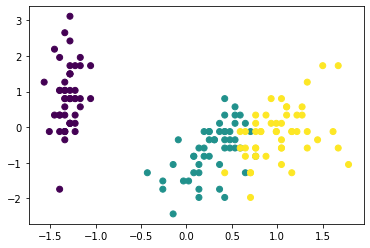

In [27]:
plt.scatter(X[:, 2], X[:, 1], c=Y)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 0.2)

In [29]:
model = KMeans(n_clusters=3, max_iterations=100)
model.fit(x_train)

In [30]:
y_pred = model.predict(x_test)

print(sum(y_pred == y_test) / len(y_test))

0.03333333333333333


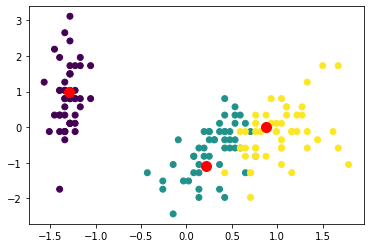

In [31]:
centroids = model.centroids

plt.scatter(X[:, 2], X[:, 1], c=Y)
plt.scatter(centroids[:, 2], centroids[:, 1], marker='o', s=100, c='r')

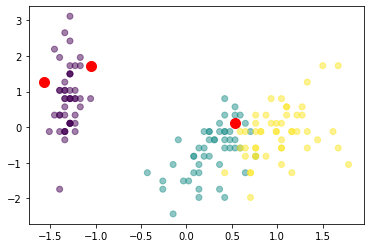

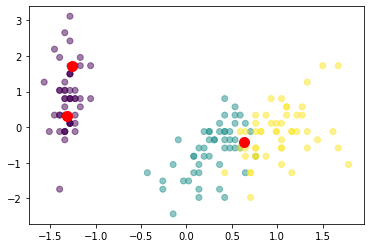

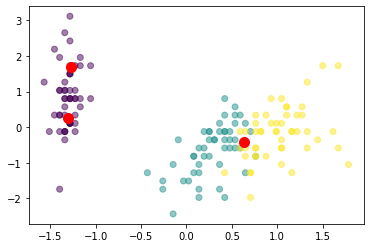

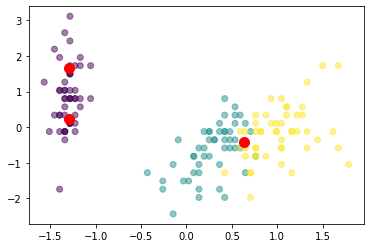

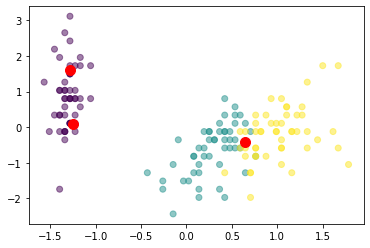

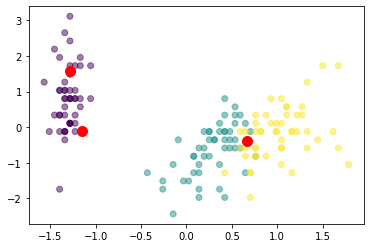

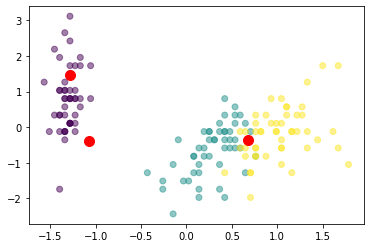

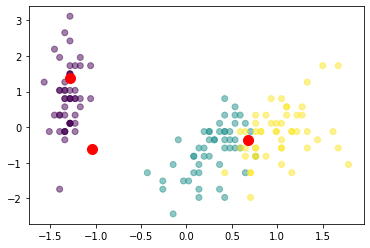

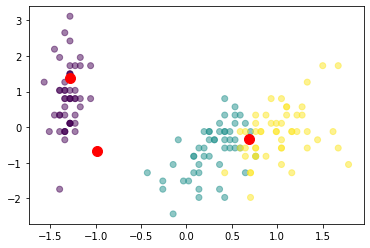

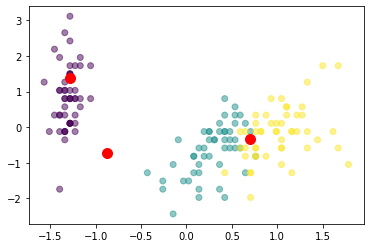

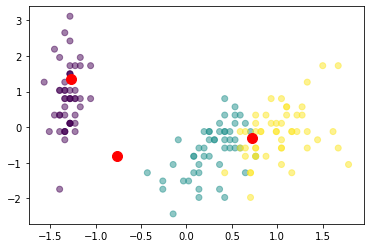

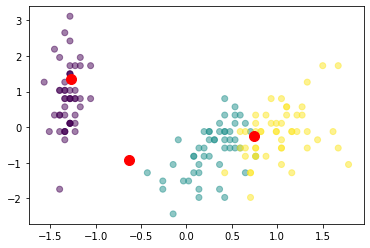

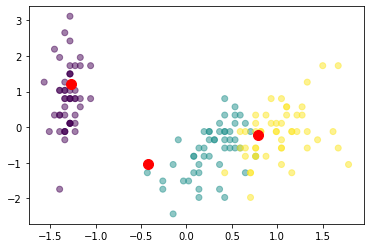

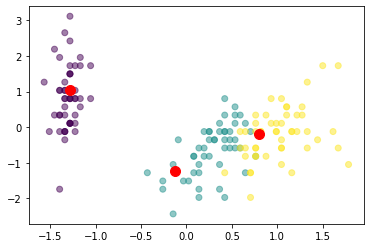

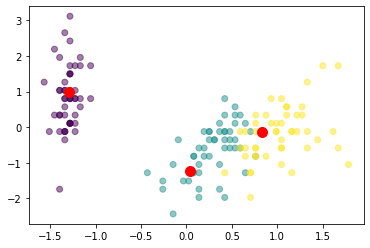

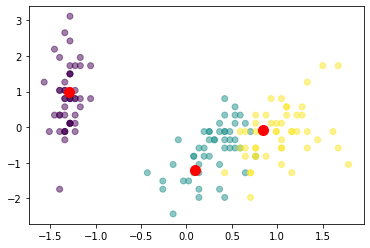

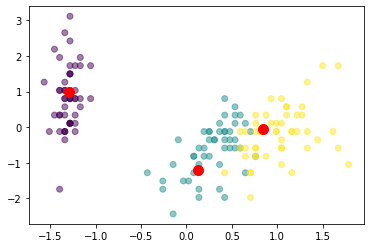

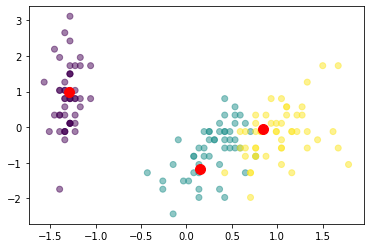

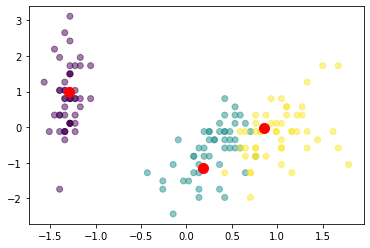

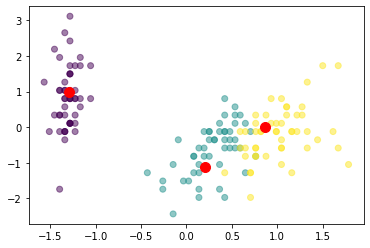

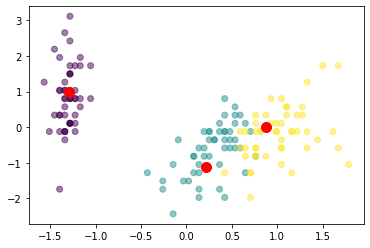

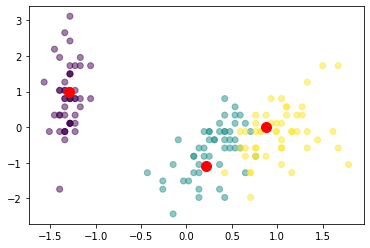

In [32]:
history = model.history

for i in range(len(history)):
    centroids = history[i]
    plt.scatter(X[:, 2], X[:, 1], c=Y, alpha=0.5)
    plt.scatter(centroids[:, 2], centroids[:, 1], marker='o', s=100, c='r')
    plt.show()